<a href="https://colab.research.google.com/github/pankajsharma2711/Cars-Logo-Identifier/blob/master/CarsModelClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)

Mounted at /content/drive


In [2]:
cd drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras 
import os
import re
import cv2
from tqdm import tqdm
from random import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, MaxPooling2D, Dropout, Conv2D
from PIL import Image
%matplotlib inline

Using TensorFlow backend.


In [0]:
TRAIN_DIR = '/content/drive/My Drive/Colab Notebooks/images/'
image_train = os.listdir(TRAIN_DIR)
imsize = 50
n_samples = np.size(image_train)

In [5]:
images = np.array([np.array(Image.open(TRAIN_DIR + img).convert("RGB")).flatten() for img in os.listdir(TRAIN_DIR)], order='F', dtype='uint8')
cars = ['Alfa Romeo', 'Audi', 'BMW', 'Chevrolet', 'Citroen', 'Dacia', 'Daewoo', 'Dodge',
        'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Lada',
        'Lancia', 'Land Rover', 'Lexus', 'Maserati', 'Mazda', 'Mercedes', 'Mitsubishi',
        'Nissan', 'Opel', 'Peugeot', 'Porsche', 'Renault', 'Rover', 'Saab', 'Seat',
        'Skoda', 'Subaru', 'Suzuki', 'Tata', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo']
labels = np.array([cars.index(re.match(r"(^\D+)", image_train[i])[0]) for i in range(n_samples)])
print(labels.shape)
print(images.shape)

(20778,)
(20778, 7500)


Text(0.5, 1.0, 'Audi')

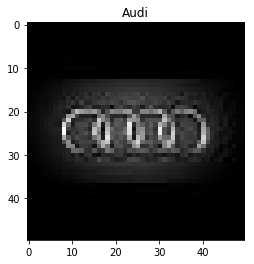

In [6]:
plt.imshow(images[1000].reshape(imsize, imsize, 3))
plt.title(cars[labels[1000]])

In [10]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2)

train_images = train_images.reshape(-1, imsize, imsize, 3)
test_images = test_images.reshape(-1, imsize, imsize, 3)

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(16622, 50, 50, 3)
(16622,)
(4156, 50, 50, 3)
(4156,)


In [0]:
ntrain_images = train_images/255.0
ntest_images = test_images/255.0

In [12]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (imsize,imsize,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
  
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
  
model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(256, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(cars), activation = 'softmax'))

model.summary()

W0619 07:32:16.960197 140259907123072 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         7

In [13]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(ntrain_images, train_labels, epochs = 30)

Epoch 1/30
16622/16622 [==============================] - 9s 570us/sample - loss: 3.4864 - acc: 0.0698
Epoch 2/30
16622/16622 [==============================] - 6s 334us/sample - loss: 2.4027 - acc: 0.3528
Epoch 3/30
16622/16622 [==============================] - 6s 333us/sample - loss: 1.6315 - acc: 0.5709
Epoch 4/30
16622/16622 [==============================] - 6s 335us/sample - loss: 1.3086 - acc: 0.6561
Epoch 5/30
16622/16622 [==============================] - 6s 334us/sample - loss: 1.1160 - acc: 0.7071
Epoch 6/30
16622/16622 [==============================] - 6s 334us/sample - loss: 0.9590 - acc: 0.7465
Epoch 7/30
16622/16622 [==============================] - 6s 333us/sample - loss: 0.8615 - acc: 0.7706
Epoch 8/30
16622/16622 [==============================] - 5s 331us/sample - loss: 0.7604 - acc: 0.7950
Epoch 9/30
16622/16622 [==============================] - 6s 335us/sample - loss: 0.7017 - acc: 0.8119
Epoch 10/30
16622/16622 [==============================] - 6s 334us/sampl

In [14]:
model.evaluate(ntest_images, test_labels)

4156/4156 [==============================] - 1s 169us/sample - loss: 1.5366 - acc: 0.7649


[1.5365818689601483, 0.7649182]

[1.5848767e-22 3.2834263e-17 1.5737049e-14 9.5808795e-15 3.5384288e-16
 4.2039216e-19 1.4497849e-28 2.1319711e-20 1.0503509e-25 9.9843255e-25
 1.8406518e-21 6.2035206e-19 1.6834941e-20 2.2357036e-26 2.9331321e-26
 2.0539180e-23 7.6572306e-26 1.4183189e-22 8.2303956e-22 1.4937870e-21
 5.4340952e-20 2.0486612e-14 3.2574995e-11 1.9079107e-20 5.5818730e-15
 1.0000000e+00 1.4390089e-26 2.6539436e-24 2.3406652e-19 1.8840403e-31
 4.3057551e-24 2.3673077e-19 1.6934299e-23 1.4536310e-24 7.1357395e-20
 2.0529466e-23 1.0012311e-26 6.0459115e-28 6.5205105e-18 4.2114541e-17]
Opel 25


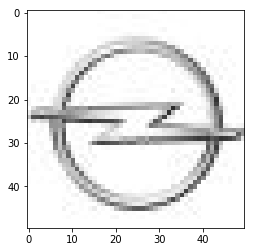

In [25]:
predict = model.predict(ntest_images)
print(predict[10])
print(cars[test_labels[10]], test_labels[10])
plt.imshow(test_images[10])